In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Titanic Survival Prediction\Dataset\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

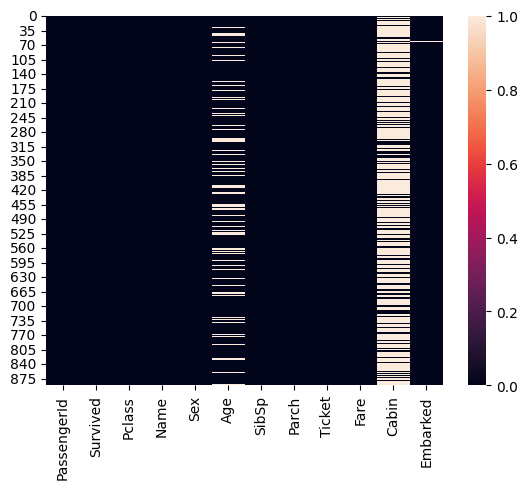

In [6]:
sns.heatmap(df.isnull())

In [7]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

<Axes: xlabel='Fare', ylabel='Density'>

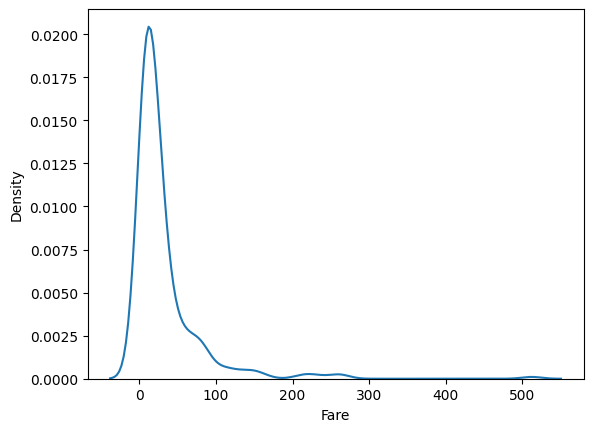

In [11]:
sns.kdeplot(df["Fare"])

<Axes: >

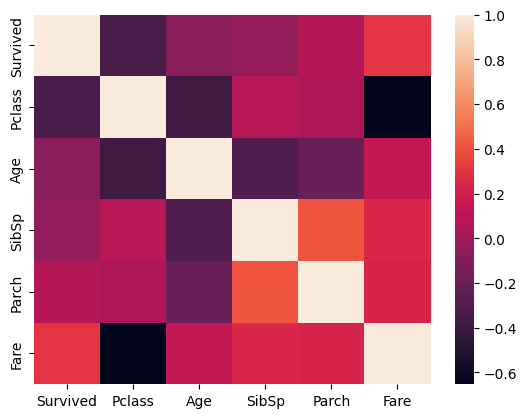

In [54]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

<Axes: ylabel='Fare'>

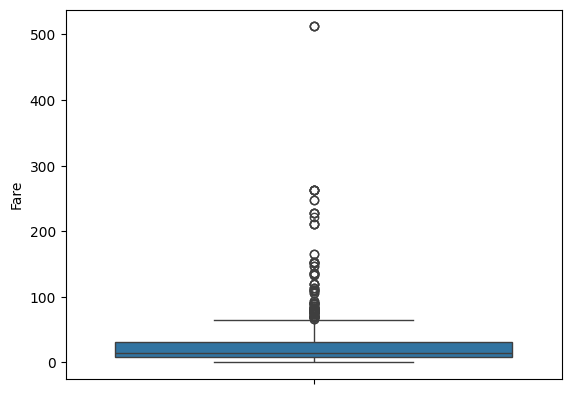

In [12]:
sns.boxplot(df["Fare"])

In [13]:
import plotly.express as px
px.box(df,x="Fare")

In [14]:
df=df[~(df["Fare"]>200)]

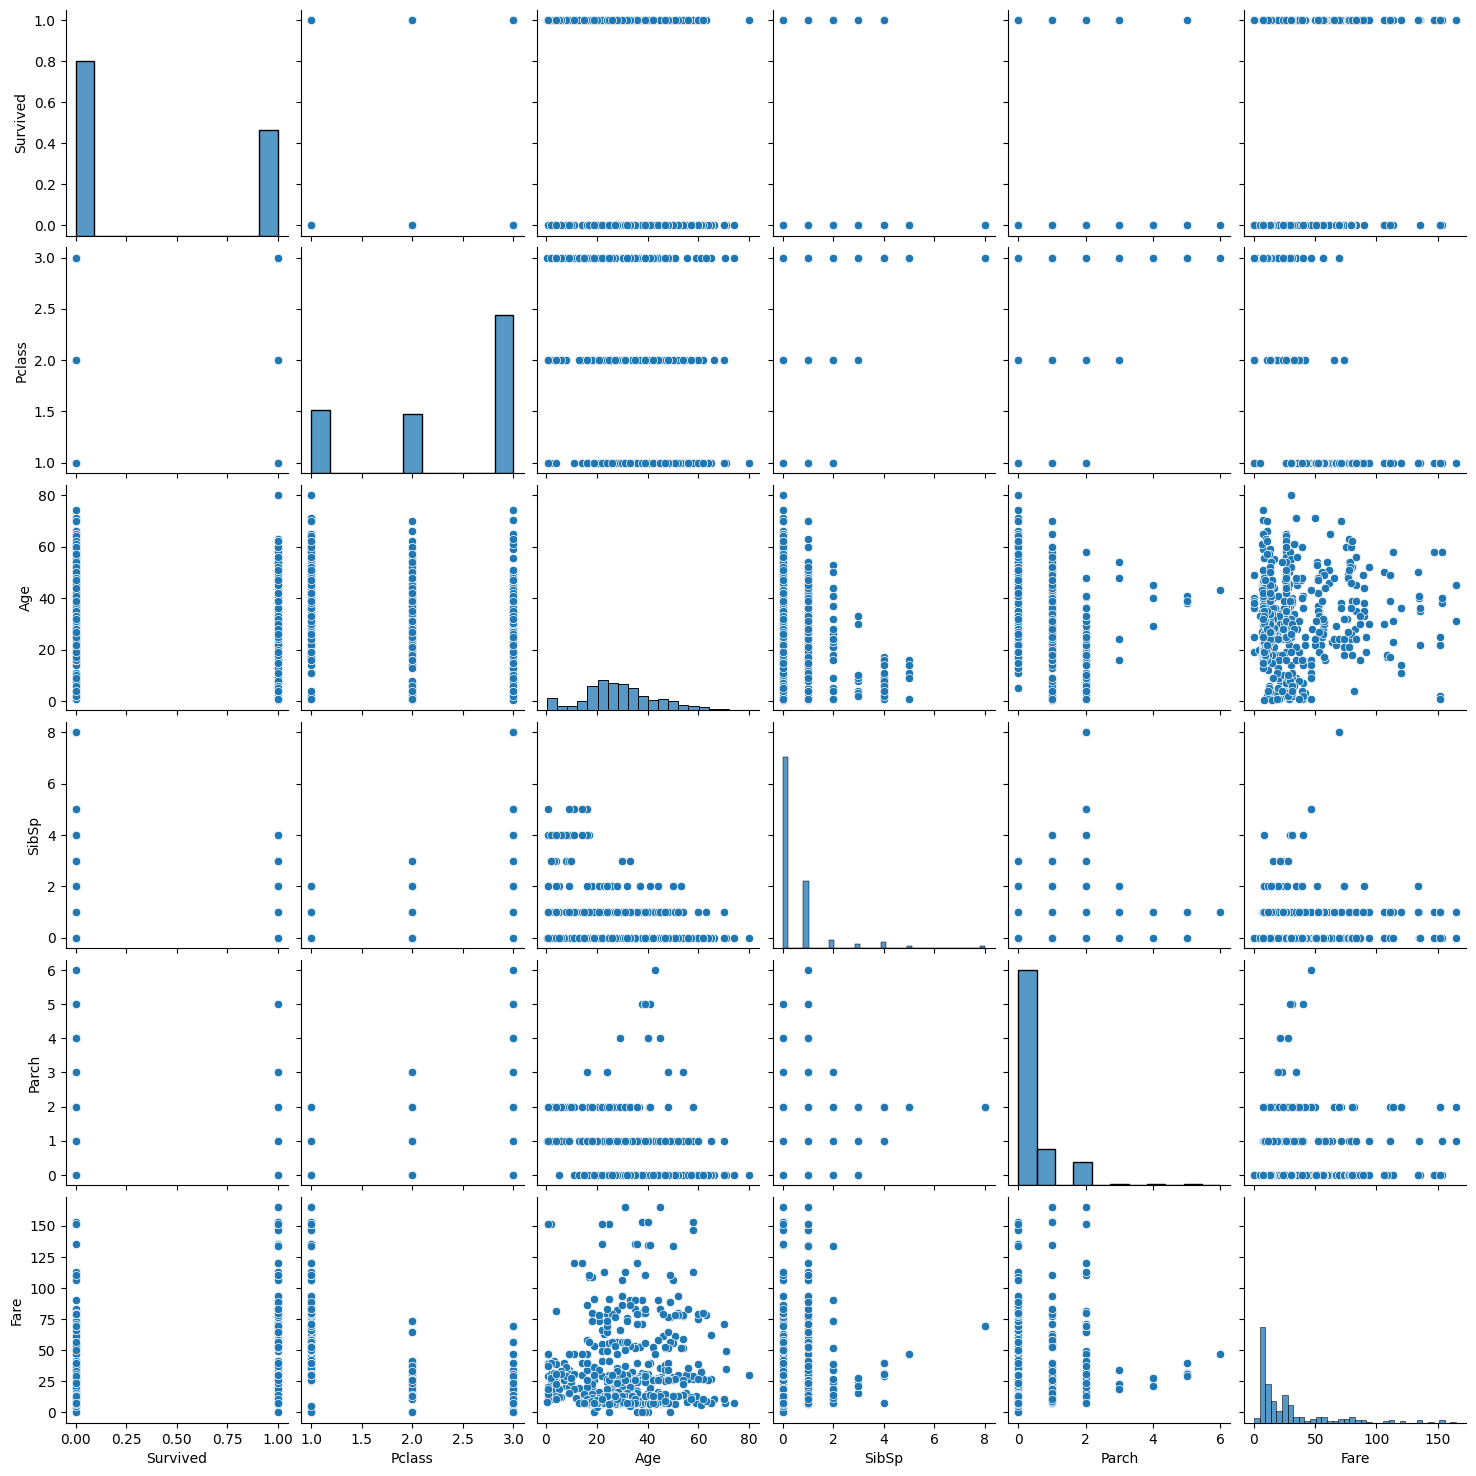

In [15]:
sns.pairplot(df)

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         175
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [17]:
X=df.iloc[:,1:]

In [18]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [19]:
y=df.iloc[:,0]

In [20]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 871, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
transformer=ColumnTransformer(
    transformers=[
        ("knn",KNNImputer(weights="distance"),["Age"]),
        ("OHE",OneHotEncoder(sparse_output=False,drop="first"),["Sex","Embarked"]),



    ],remainder="passthrough"

    
)

In [23]:
X_train_trf=transformer.fit_transform(X_train)

X_test_trf=transformer.transform(X_test)

In [24]:
X_train_trf.shape

(696, 8)

In [25]:
X_train_trf

array([[24.5      ,  1.       ,  0.       , ...,  0.       ,  0.       ,
         8.05     ],
       [56.       ,  1.       ,  0.       , ...,  0.       ,  0.       ,
        26.55     ],
       [30.0505694,  0.       ,  0.       , ...,  0.       ,  2.       ,
        22.3583   ],
       ...,
       [25.       ,  0.       ,  0.       , ...,  0.       ,  1.       ,
        26.       ],
       [ 4.       ,  1.       ,  0.       , ...,  0.       ,  2.       ,
        81.8583   ],
       [37.       ,  1.       ,  0.       , ...,  2.       ,  0.       ,
         7.925    ]])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_train_scaled=scaler.fit_transform(X_train_trf)
X_test_scaled=scaler.transform(X_test_trf)

In [29]:
X_test_scaled

array([[-0.15555972,  0.71627053, -0.31547752, ...,  0.43611537,
        -0.47451813, -0.36080523],
       [-0.8383152 ,  0.71627053, -0.31547752, ..., -0.47540504,
        -0.47451813, -0.62719729],
       [-0.91417692,  0.71627053, -0.31547752, ...,  0.43611537,
        -0.47451813,  2.86186083],
       ...,
       [-0.61073004, -1.39612053, -0.31547752, ..., -0.47540504,
        -0.47451813, -0.64047239],
       [-0.15555972,  0.71627053, -0.31547752, ...,  1.34763577,
        -0.47451813, -0.63527733],
       [-2.20382617,  0.71627053, -0.31547752, ...,  0.43611537,
         2.01804502, -0.19716099]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg=LogisticRegression()

In [32]:
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [33]:
logreg.score(X_test_scaled,y_test)

0.76

In [40]:
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc.score(X_test_scaled,y_test)

0.7885714285714286

In [35]:
from xgboost import XGBRFClassifier

In [36]:
xgc=XGBRFClassifier()

In [ ]:
xgc.fit(X_train_scaled,y_train)
xgc.score(X_test_scaled,y_test)

Applying GridSearchCv

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-1, cv=10, verbose=2)


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8475362318840579
